# Learning Outcomes
- Geometric transformation
    - rotation, translation, affine transformation, perspective transformation
- Some basic drawing function available
    - Line, circle, ellipse,rectangle,text
- Bitwise operation
    - OR, XOR,AND, NOT
- Convolution: sliding window performing linear combination
    - Image smoothing (denoising), Sharpening, At the heart of CN, Others

## Setup

In [1]:
import sys
assert sys.version_info >= (3,7)

import numpy as np
import cv2 as cv
from util_func import *

## Geometric transformation

### translation

In [2]:
img = cv.imread("images/lena.jfif")

h,w = img.shape[:2]
tx = 50
ty = 100
M = np.float32([[1,0,tx],[0,1,ty]])

dst = cv.warpAffine(img,M,(w,h))

show_img(f"translation tx:{tx},ty:{ty}",dst)

### Rotation

In [3]:
#define M: center, angle, scale
yc, xc = h//2, w//2

#positive mean anticlockwise
angle = 90

M = cv.getRotationMatrix2D((xc,yc),angle,1)
dst = cv.warpAffine(img, M, (w,h))

show_img("rotation",dst)

## Custom affine transform

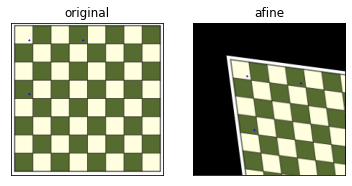

In [4]:
img = cv.imread("images/chessboard.png")
img = cv.cvtColor(img,cv.COLOR_BGR2RGB)
img_copy = img.copy()

h,w = img.shape[:2]

p0 = np.float32([[25,25],[100,25],[25,100]])
p1 = np.float32([[75,75],[150,85],[85,150]])


for pt in p0:
    cv.circle(img,(int(pt[0]),int(pt[1])),1,(0,0,255),-1)
    
M = cv.getAffineTransform(p0,p1)
dst = cv.warpAffine(img,M,(w,h))

plt.subplot(121),plt_img(img,title="original")
plt.subplot(122),plt_img(dst,title="afine")
plt.show()

In [5]:
dst[75,75,:]

array([  0,   0, 255], dtype=uint8)

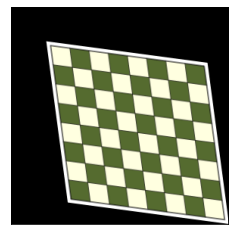

In [6]:
dst_new = cv.warpAffine(img_copy,M,(w+75,h+75))
plt_img(dst_new)

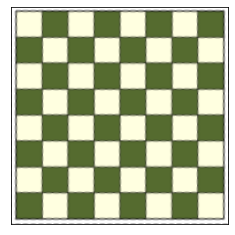

In [7]:
M_inv = cv.getAffineTransform(p1,p0)
ori_restored = cv.warpAffine(dst_new,M_inv,(w,h))

plt_img(ori_restored)

### Perspective transform

In [8]:
img = cv.imread("images/name_card_sample.webp")
img_copy = img.copy()
show_img("img",img,adjust=True)

In [9]:
#get the 4 points
p = []

def mouse(event, x,y,flags,params):
    if event == cv.EVENT_LBUTTONDOWN:
        print((x,y))
        p.append((x,y))
        cv.circle(img,(x,y),2,(0,0,255),-1)
        cv.imshow("img",img)
        
cv.imshow("img",img)
cv.setMouseCallback("img",mouse)
cv.waitKey(0)
cv.destroyAllWindows()

(129, 113)
(758, 52)
(899, 260)
(85, 381)


In [10]:
!pip install scipy

In [11]:
from scipy.spatial.distance import euclidean

In [12]:
w1 = euclidean(p[0],p[1])
w2 = euclidean(p[2],p[3])

h1 = euclidean(p[0],p[1])
h2 = euclidean(p[2],p[3])

W = max(w1, w2)
H = max(h1,h2)

p_arr = np.float32(p)
dst = np.float32([[0,0],[W-1,0],[W-1,H-1],[0,H-1]])

M = cv.getPerspectiveTransform(p_arr,dst)
warp = cv.warpPerspective(img_copy,M,(int(W),int(H)))

cv.namedWindow("img",cv.WINDOW_NORMAL)
cv.imshow("img",img_copy)
show_img("warp",warp)

## Drawing Funcion

In [13]:
#line
img = cv.imread("images/dog.jfif")

print(img.shape)

(168, 300, 3)


In [14]:
img_copy = img.copy()

cv.line(img_copy,(30,80),(150,150),(0,0,255),4,cv.LINE_AA)
show_img("line",img_copy)

In [15]:
# circle
img_copy = img.copy()

cv.circle(img_copy,(145,50),40,(0,0,255),2,cv.LINE_AA)
show_img("circle",img_copy)

In [16]:
# ellipse
img_copy = img.copy()
axes = (50,40)
angle = 90

cv.ellipse(img_copy,(145,50),axes,angle,0,360,(100,50,150),4,cv.LINE_AA)
show_img("ellipse",img_copy)

In [17]:
# rectangle
img_copy = img.copy()

cv.rectangle(img_copy,(30,80),(150,150),(0,0,255),4,cv.LINE_AA)
show_img("rectangle",img_copy)

In [18]:
# text
img_copy = img.copy()

cv.putText(img_copy,"I'm a happy dog!",(45,145),cv.FONT_HERSHEY_SIMPLEX,0.65,(200,15,50),2)
show_img("font",img_copy)

### create a custom drawing board
Trackbar function, mouse callback function.

In [19]:
WHITE = (255,255,255)
RED = (0,0,255)
GREEN = (0,255,0)
BLUE = (255,0,0)

CYAN = (255,255,0)
MAGENTA = (255,0,255)
YELLOW = (0,255,255)

colors = (RED,GREEN,BLUE,CYAN,MAGENTA,YELLOW,WHITE)

# create a trackbar function, mouse callback function, while loop to show template
def nothing(x):
    pass

p0 = p1 =(0,0)

def mouse(event, x, y,flags,params):
    global p0,p1
    if event == cv.EVENT_LBUTTONDOWN:
        p0 = (x,y)
        
    elif event == cv.EVENT_LBUTTONUP:
        p1 = (x,y)
        
        d = cv.getTrackbarPos(tr1_name, wn)
        if d==0:
            d=-1
        i = cv.getTrackbarPos(tr2_name,wn)
        color = colors[i]
        cv.rectangle(img,p0,p1,color,d)
        cv.imshow(wn,img)

wn = "window"
tr1_name = "thickness"
tr2_name = "color"
img = np.zeros((400,400,3),dtype = np.uint8)
cv.namedWindow(wn)
cv.createTrackbar(tr1_name,wn,0,10,nothing)
cv.createTrackbar(tr2_name,wn,0,6,nothing)
cv.setMouseCallback(wn,mouse)


while (1):
    cv.imshow(wn,img)
    k = cv.waitKey(0) & 0xFF
    if k ==27:
        break
        
    if k ==ord('c'):
        img[:] = 0
        
cv.destroyAllWindows()
    

In [20]:
img = np.zeros((400,400),dtype = np.uint8)

yc ,xc = img.shape[0]//2, img.shape[1]//2
radius = np.arange(20,200,15)
for r in radius:
    cv.circle(img,(xc,yc),r,255, 2)
    

cv.putText(img,"bull eye",(20,375),cv.FONT_HERSHEY_SIMPLEX,0.65,255,2)
show_img("img",img)

## bitwise operation

In [21]:
rect = np.zeros((400, 400), np.uint8)
rect[30:370,30:370] = 255

circle = np.zeros((400, 400), np.uint8)
cv.circle(circle, (200, 200), 200, 255, -1)

cv.imshow("rectangle", rect)
show_img("circle", circle)


In [22]:
#AND
res_AND = cv.bitwise_and(rect,circle)
show_img("AND",res_AND)

In [23]:
#OR
res_OR = cv.bitwise_or(rect,circle)
show_img("OR",res_OR)

In [24]:
#XOR
res_XOR = cv.bitwise_xor(rect,circle)
show_img("XOR",res_XOR)

In [25]:
#NOT
res_NOT = cv.bitwise_not(rect)
show_img("NOT",res_NOT)

In [26]:
#
img = cv.imread("images/dog.jfif")
h,w = img.shape[:2]
mask = np.zeros((h,w),dtype = np.uint8)
cv.circle(mask,(145,50),40,255,-1)

res = cv.bitwise_and(img,img,mask = mask)

show_img("res",res)

## Convolution

In [27]:
# identity kernel
img = cv.imread("images/opencv_logo.png")

kernel = np.zeros((3,3))
kernel[1,1] = 1

dst = cv.filter2D(img,-1,kernel)

cv.imshow("original",img)
show_img("identity",dst)

In [28]:
#sharpening kernel
kernel = np.array([[0,-1,0],[-1,5,-1],[0,-1,0]])

img = cv.imread("images/dog.jfif")

dst = cv.filter2D(img, -1,kernel)

cv.imshow("original",img)
show_img("identity",dst)

In [29]:
#blur
kernel = np.ones((5,5))/25

blur = cv.filter2D(img,-1,kernel)

#better sharperning way
dst = cv.addWeighted(img,1.6,blur,-0.6,0)

show_img("unsharp_masking",dst)

4 functions to perfome image blurring:
- "cv blur" : mean average filter
- "cv.GaussianBlur" : Gaussian filter, suitable for Gaussian noise
- "cv.medianFilter" : mediam filter, useful to eliminate salt and pepper noise
- "cv.bilateralFilter" : edge-preserving filter

### Exercise

In [30]:
!pip install imutils

In [31]:
import imutils as im
import math

In [32]:
# imutils
img = cv.imread("images/lena.jfif")
yc, xc = h//2, w//2

#rotate the image by 45 degree
rotated = im.rotate_bound(img, 45)

show_img("rotation",rotated)

In [33]:
#modify the transformation matrix
def rotate_image(img, angle):
   h , w = img.shape[:2]
   yc, xc = h//2, w//2
   
   M = cv.getRotationMatrix2D((xc,yc),angle,1)
   
   radians = math.radians(angle)
   sin = math.sin(radians)
   cos = math.cos(radians)
   bound_w = int((h * abs(sin)) + (w * abs(cos)))
   bound_h = int((h * abs(cos)) + (w * abs(sin)))
   
   M[0, 2] += ((bound_w / 2) - yc)
   M[1, 2] += ((bound_h / 2) - xc)
   
   M = cv.warpAffine(img, M, (bound_w, bound_h))
   return M

img = cv.imread('images/lena.jfif',1)
rotated_image = rotate_image(img, 45)

cv.imshow('Rotated image', rotated_image)
cv.waitKey(0) 
cv.destroyAllWindows()

### Exercise 2

In [52]:
flower = cv.imread("images/flower.jfif")
bee = cv.imread("images/native-bee.png")

# creating mask of flower
gray_img = cv.cvtColor(flower,cv.COLOR_BGR2GRAY)
ret, mask = cv.threshold(gray_img,70,255,cv.THRESH_BINARY)
mask = mask.astype(np.uint8)
inv_mask = cv.bitwise_not(mask)
inv_mask = inv_mask.astype(np.uint8)

h, w = flower.shape[:2]

# the location that the flower should be put
roi = bee[0:h, 0:w]

# extract flower
extract_flower = cv.bitwise_and(flower,flower,mask=mask)

# blacken the region of the flower will be located
extract_roi = cv.bitwise_and(roi, roi, mask = inv_mask)

# overlay
dst = cv.addWeighted(extract_flower, 1, extract_roi,1,0)
bee[0:h, 0:w] = dst

show_img("flower_bee",bee)

### Exercise 3

In [ ]:
# 3x3
kernel = np.array([[0,-1,0],[-1,5,-1],[0,-1,0]])

img = cv.imread("images/native-bee.png")

dst = cv.filter2D(img, -1,kernel)

cv.imshow("original",img)
show_img("3x3",dst)

In [ ]:
#5x5
kernel = np.ones((5,5))
kernel *= -1
kernel [2,2] = 25
kernel_arr = np.int32(kernel)

img = cv.imread("images/native-bee.png")

dst_5 = cv.filter2D(img, -1,kernel_arr)

cv.imshow("original",img)
show_img("5x5",dst_5)

plt.subplot(121),plt_img( cv.cvtColor(dst,cv.COLOR_BGR2RGB),title="3x3")
plt.subplot(122),plt_img( cv.cvtColor(dst_5,cv.COLOR_BGR2RGB),title="5x5")
plt.show()

In [ ]:
#Explaination: The 5x5 present a better sharpen effect as the 5x5 perform a larger area of work at a time. 
#In this case, the pricture is more complex in feature.
#By replacing the 0 with -1 in 5x5 kernel, neighboring pixels of the center will have a lower contribution to the output
# causing effectively darkening the areas around edges, making them stand out more prominently.

### Exercise 4

In [ ]:
img = cv.imread("images/noise_lena.jpg")

#smoothing using average filter
kernel = np.ones((5,5))/25

blur_avg_filter = cv.filter2D(img,-1,kernel)

dst_avg_filter = cv.addWeighted(img,1.6,blur_avg_filter,-0.6,0)

#smoothing using Gaussian kernel
dst_Gau = cv.GaussianBlur(img,(5,5),0)

#smoothing using median filter
dst_median = cv.medianBlur(img,5)

cv.imshow("original",img)
cv.imshow("average filter",dst_avg_filter)
cv.imshow("Gaussian",dst_Gau)
show_img("Median",dst_median)

In [ ]:
# average filter: noise reduced
# Gaussian kernel: noise maintain but the image blurred
# median filter: noise eliminated but the image is blurred
# the type of noise is salt-and-pepper noise as it can be eliminated by using median filter